In [2]:
import pandas as pd
import seaborn as sns
import os 

In [3]:
os.getcwd()

'/Users/venkat'

In [4]:
os.chdir('/Users/venkat/Documents')

In [5]:
# Accessing the dataset that provides details about CO2 emissions
co2_data = pd.read_csv('co2_emission.csv')

In [6]:
# Investigating the data
co2_data.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [7]:
co2_data['Entity'].value_counts()

Statistical differences      267
Asia and Pacific (other)     267
EU-28                        267
Europe (other)               267
Americas (other)             267
                            ... 
Antarctic Fisheries           21
Wallis and Futuna Islands     17
Timor                         16
Christmas Island              14
Liechtenstein                 11
Name: Entity, Length: 233, dtype: int64

In [8]:
co2_data['Code'].value_counts()

OWID_WRL    267
USA         267
GBR         267
IND         256
CHN         254
           ... 
MHL          26
KGZ          26
TLS          16
CXR          14
LIE          11
Name: Code, Length: 222, dtype: int64

In [9]:
# The years range from 1751 to 2017
co2_data['Year'].sort_values()

19394    1751
20353    1751
19661    1751
1251     1751
9204     1751
         ... 
15193    2017
3498     2017
15341    2017
14436    2017
20852    2017
Name: Year, Length: 20853, dtype: int64

In [10]:
co2_data['Annual CO₂ emissions (tonnes )'].describe()

count    2.085300e+04
mean     1.930517e+08
std      1.345143e+09
min     -6.255223e+08
25%      3.187680e+05
50%      3.828880e+06
75%      3.706898e+07
max      3.615326e+10
Name: Annual CO₂ emissions (tonnes ), dtype: float64

In [11]:
co2_data.shape

(20853, 4)

In [12]:
# There are also calculations within the data
#co2_data[co2_data['Annual CO₂ emissions (tonnes )']<0]

In [13]:
# Since we are focusing only on the actual data per year, we can remove this data
new_data = co2_data[co2_data['Entity']!='Statistical differences']

In [14]:
# We can find what values are correlated with the annual CO2 emissions
# Entity and Code are basically the same
# year should have some correlation with emission increase
new_data.dtypes

Entity                             object
Code                               object
Year                                int64
Annual CO₂ emissions (tonnes )    float64
dtype: object

In [15]:
# Focusing on data in America specifically
us_data = new_data[new_data['Code']=='USA']

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Annual CO₂ emissions (tonnes )'>

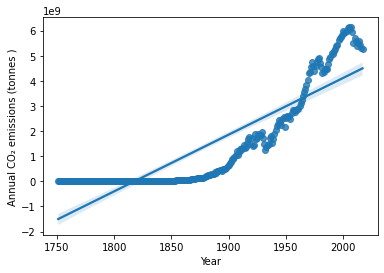

In [16]:
# There seems to be some correlation, but it is not a linear relationship
sns.regplot(us_data['Year'], us_data['Annual CO₂ emissions (tonnes )'])

# Part 2 - Working on finding correlations in the data

<AxesSubplot:>

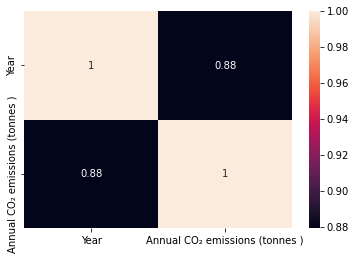

In [17]:
# Clearly, the year DOES have a correlation with the annual CO2 emissions in tons
sns.heatmap(us_data.corr(), annot=True)

In [18]:
# Let's see if the string data has a correlation with CO2 emissions
str_data = new_data
for col in str_data.columns:
    if(str_data[col].dtype=='object'):
        str_data[col] = str_data[col].astype('category')
        str_data[col] = str_data[col].cat.codes

/var/folders/6t/qwygyn5x50q_0vj6xlykk_xh0000gp/T/ipykernel_2607/2178863008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  str_data[col] = str_data[col].astype('category')
/var/folders/6t/qwygyn5x50q_0vj6xlykk_xh0000gp/T/ipykernel_2607/2178863008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  str_data[col] = str_data[col].cat.codes


In [19]:
str_data

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,0,1,1949,14656.00
1,0,1,1950,84272.00
2,0,1,1951,91600.00
3,0,1,1952,91600.00
4,0,1,1953,106256.00
...,...,...,...,...
20848,231,221,2013,11536239.29
20849,231,221,2014,11866348.41
20850,231,221,2015,10907603.94
20851,231,221,2016,9932649.88


In [20]:
# No NULL values
str_data.isnull().sum()

Entity                            0
Code                              0
Year                              0
Annual CO₂ emissions (tonnes )    0
dtype: int64

In [21]:
# The number of each value is similar to the very start, so it seems that cat codes worked
str_data['Entity'].value_counts()

71     267
138    267
63     267
4      267
228    267
      ... 
8       21
227     17
208     16
46      14
121     11
Name: Entity, Length: 232, dtype: int64

<AxesSubplot:>

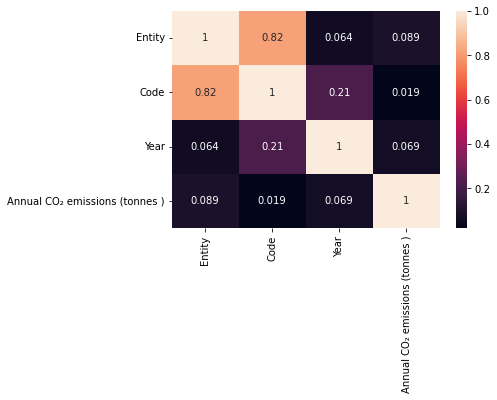

In [22]:
sns.heatmap(str_data.corr(), annot=True)

In [23]:
isolated_data = str_data[['Entity', 'Annual CO₂ emissions (tonnes )']].corr()

<AxesSubplot:>

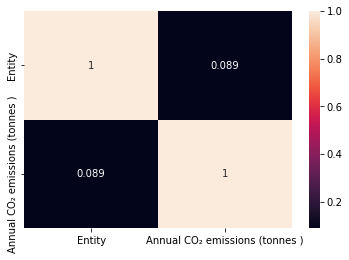

In [24]:
sns.heatmap(isolated_data, annot=True)

In [25]:
# The location does not directly affect the annual carbon dioxide emissions, but it seems that the year does DEPENDING on the location
# Let us investigate the year correlation with the CO2 emissions in other countries

# Part Three - Do Some Countries Have Higher Correlations?

In [26]:
# Research online shows that the top 5 carbon dioxide emissions come from: US, China, Russia, Brazil and Indonesia
co2_data['Code'].value_counts()

OWID_WRL    267
USA         267
GBR         267
IND         256
CHN         254
           ... 
MHL          26
KGZ          26
TLS          16
CXR          14
LIE          11
Name: Code, Length: 222, dtype: int64

In [27]:
china_data = co2_data[co2_data['Code']=='CHN']
russia_data = co2_data[co2_data['Code']=='RUS']
brazil_data = co2_data[co2_data['Code']=='BRA']
indonesia_data= co2_data[co2_data['Code']=='IDN']

In [28]:
china_data.sort_values(by = 'Year', ascending=True)

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
4231,China,CHN,1751,0.000000e+00
4232,China,CHN,1752,0.000000e+00
4233,China,CHN,1753,0.000000e+00
4234,China,CHN,1754,0.000000e+00
4235,China,CHN,1755,0.000000e+00
...,...,...,...,...
4480,China,CHN,2013,9.796527e+09
4481,China,CHN,2014,9.820360e+09
4482,China,CHN,2015,9.716468e+09
4483,China,CHN,2016,9.704479e+09


In [29]:
print(russia_data.shape) # Note that there is very little data on Russia (Only starts from 1959)
russia_data.head()

(59, 4)


,Entity,Code,Year,Annual CO₂ emissions (tonnes )
15636,Russia,RUS,1959,8.547876e+08
15637,Russia,RUS,1960,8.899830e+08
15638,Russia,RUS,1961,9.178258e+08
15639,Russia,RUS,1962,9.633179e+08
15640,Russia,RUS,1963,1.033106e+09


In [30]:
brazil_data

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
2980,Brazil,BRA,1901,2103136.0
2981,Brazil,BRA,1902,2506176.0
2982,Brazil,BRA,1903,2440224.0
2983,Brazil,BRA,1904,2619760.0
2984,Brazil,BRA,1905,2799296.0
...,...,...,...,...
3092,Brazil,BRA,2013,493593511.3
3093,Brazil,BRA,2014,519526349.7
3094,Brazil,BRA,2015,512081882.0
3095,Brazil,BRA,2016,473741376.0


In [31]:
indonesia_data

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
9460,Indonesia,IDN,1889,3664.0
9461,Indonesia,IDN,1890,14656.0
9462,Indonesia,IDN,1891,21984.0
9463,Indonesia,IDN,1892,179536.0
9464,Indonesia,IDN,1893,403040.0
...,...,...,...,...
9584,Indonesia,IDN,2013,486130031.7
9585,Indonesia,IDN,2014,460015658.7
9586,Indonesia,IDN,2015,459628755.9
9587,Indonesia,IDN,2016,464856818.4


<AxesSubplot:>

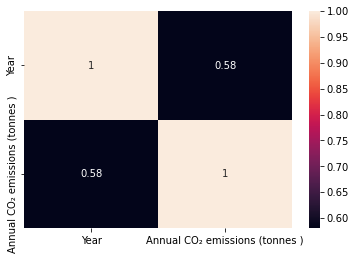

In [32]:
sns.heatmap(china_data.corr(), annot=True) # Somewhat of a correlation - 58%

<AxesSubplot:>

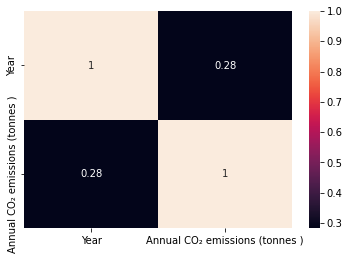

In [33]:
sns.heatmap(russia_data.corr(), annot=True) # LOW correlation - 28%
# The low correlation could also be a result of the little data under Russia

<AxesSubplot:>

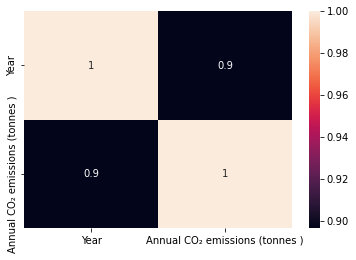

In [34]:
sns.heatmap(brazil_data.corr(), annot=True) # High correlation - 90%

<AxesSubplot:>

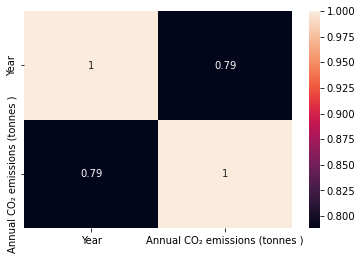

In [35]:
sns.heatmap(indonesia_data.corr(), annot=True) # Relatively high correlation - 79%

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Annual CO₂ emissions (tonnes )'>

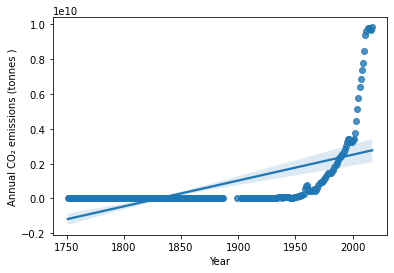

In [36]:
sns.regplot(china_data['Year'], china_data['Annual CO₂ emissions (tonnes )']) # very flat and only peaks at the end

In [37]:
# Since the data is inconsistent with the known countries that produce highest carbon dioxide emissions, we can stick to the US data

In [38]:
america = (co2_data[co2_data['Entity'] == 'Americas (other)'])

<AxesSubplot:>

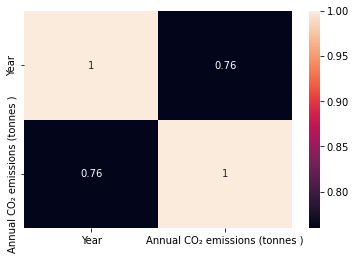

In [39]:
# The Americas(land around the United States) seems to also have a high year-to-CO2 emissions correlation
sns.heatmap(america.corr(), annot=True)

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Annual CO₂ emissions (tonnes )'>

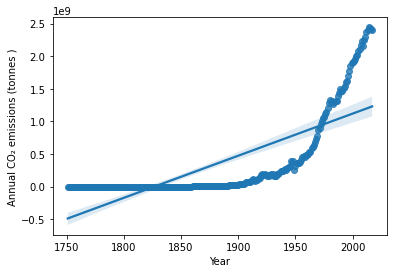

In [40]:
sns.regplot(america['Year'], america['Annual CO₂ emissions (tonnes )'])

In [41]:
# Let us do model fitting using data from the United States only
# We will start with Linear Regression

In [42]:
# splitting the data into independent variable and target variable
X = us_data['Year']
y = us_data['Annual CO₂ emissions (tonnes )']

In [43]:
# splitting the data so 70% is used to train the model and the rest is used to test it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 41)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((186,), (81,), (186,), (81,))

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
# Changing the series value to a DataFrame for model fitting to work
X_train = pd.DataFrame(X_train)

In [48]:
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
X_test = pd.DataFrame(X_test)

In [50]:
# Predicted values based on input from the training set
pred1 = lr.predict(X_test)

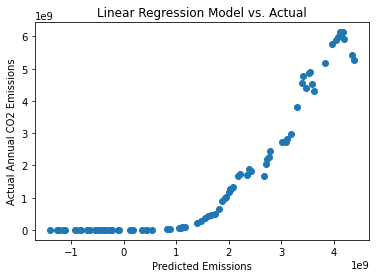

In [51]:
# The graph does shows a very poor correlation
import matplotlib.pyplot as plt
plt.title("Linear Regression Model vs. Actual")
plt.xlabel("Predicted Emissions")
plt.ylabel("Actual Annual CO2 Emissions")
plt.scatter(pred1, y_test)

In [52]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred1, y_test) # The mean absolute error is HIGH: ~ 846,616,476 tons of CO2 off

846616475.9301833

# Part 4: Finding Better Models for More Accurate Predictions

In [53]:
# Now, I will use the Decision Tree Regressor Model to get more accurate predictions
from sklearn.tree import DecisionTreeRegressor

In [54]:
tr = DecisionTreeRegressor()

In [55]:
tr.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
# The new predictions through this model - Note that the process is the same but the models are different
pred2 = tr.predict(X_test)

Text(0, 0.5, 'Actual Annual CO2 Emissions')

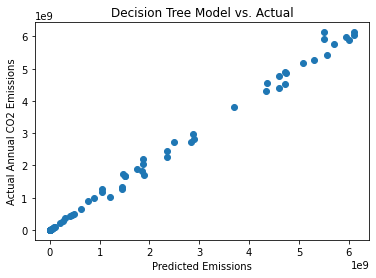

In [57]:
plt.scatter(pred2, y_test) # The resulting graph looks much closer to linear, meaning the model was more accurate
plt.title("Decision Tree Model vs. Actual")
plt.xlabel("Predicted Emissions")
plt.ylabel("Actual Annual CO2 Emissions")

In [58]:
mean_absolute_error(pred2, y_test) # The mean absolute error is better: ~76,680,508 tons off

76680507.8888889

In [59]:
# Although the model is much better, it does not seem to be the best one
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [60]:
rg = RandomForestRegressor(max_depth=None, random_state=0)

In [61]:
rg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [62]:
pred3 = rg.predict(X_test)

Text(0, 0.5, 'Actual Annual CO2 Emissions')

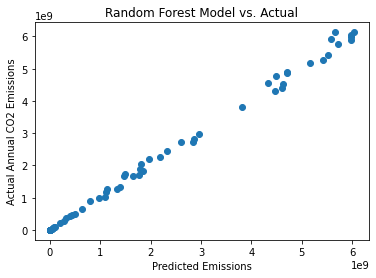

In [91]:
plt.scatter(pred3, y_test) 
plt.title("Random Forest Model vs. Actual")
plt.xlabel("Predicted Emissions")
plt.ylabel("Actual Annual CO2 Emissions")

In [64]:
mean_absolute_error(pred3, y_test) # The mean absolute error is also better: ~61,265,805 tons off

61265804.68432097

In [65]:
from sklearn.svm import SVR

In [66]:
regressor = SVR(kernel='rbf')
regressor2 = SVR(kernel='poly', degree=1, C=100, gamma='auto')
regressor3 = SVR(kernel='sigmoid', C=50, gamma='auto')

In [67]:
regressor3.fit(X_train, y_train)
pred4 = regressor3.predict(X_test)

Text(0, 0.5, 'Actual Annual CO2 Emissions')

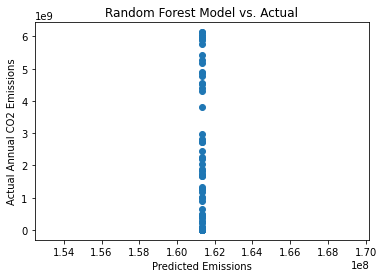

In [68]:
plt.scatter(pred4, y_test) # None of the models work that well, so some parameters might be very off
plt.title("Random Forest Model vs. Actual")
plt.xlabel("Predicted Emissions")
plt.ylabel("Actual Annual CO2 Emissions")

In [69]:
mean_absolute_error(pred4, y_test)

1645274393.925926

In [70]:
regr = SVR()

In [71]:
regr.fit(X_train, y_train)
regrp = regr.predict(X_test)

Text(0, 0.5, 'Actual Annual CO2 Emissions')

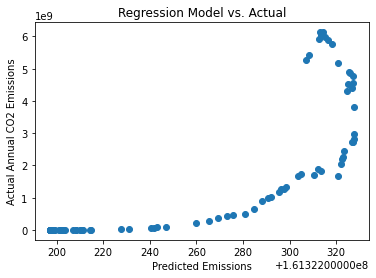

In [72]:
plt.scatter(regrp, y_test) # 
plt.title("Regression Model vs. Actual")
plt.xlabel("Predicted Emissions")
plt.ylabel("Actual Annual CO2 Emissions")

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
'''
Tests different parameters to see which makes the most accurate predictions
param_grid = {
    "C": [0.1, 1, 100],
    "epsilon": [0.01, 0.01, 1],
    "kernel" : ['linear', 'poly', 'rbf'],
    "gamma" : ["scale", "auto"]
    
}
'''

'\nTests different parameters to see which makes the most accurate predictions\nparam_grid = {\n    "C": [0.1, 1, 100],\n    "epsilon": [0.01, 0.01, 1],\n    "kernel" : [\'linear\', \'poly\', \'rbf\'],\n    "gamma" : ["scale", "auto"]\n    \n}\n'

In [75]:
# Split the data into 2 parts
#grid_search = GridSearchCV(SVR(), param_grid, cv=2)

In [76]:
# This part could not load so I will try a different model for now
#grid_search.fit(X_train, y_train)

In [77]:
#gr_p = grid_search.predict(X_test)

In [78]:
#grid_search.best_params_

In [79]:
from scipy.stats import linregress
import numpy as np
line = linregress(us_data['Year'], np.log(us_data['Annual CO₂ emissions (tonnes )']))
slope = line.slope
y_int = line.intercept

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [80]:
x_val = np.linspace(1750, 2017, 267)
y_val = 1.01374**(x_val) * 0.00700511

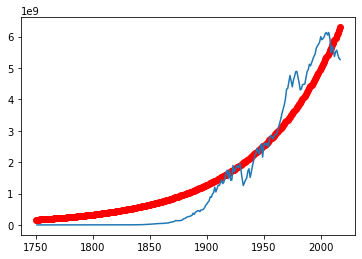

In [81]:
plt.plot(us_data['Year'], us_data['Annual CO₂ emissions (tonnes )'])
plt.scatter(x_val, y_val, color='red')


In [82]:
us_data[us_data['Year'] == 1850]

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
19760,United States,USA,1850,19792928.0


In [83]:
us_data[us_data['Year'] == 1900]

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
19810,United States,USA,1900,662736992.0


In [84]:
us_data[us_data['Year'] == 1950]

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
19860,United States,USA,1950,2.535942e+09


In [85]:
us_data[us_data['Year'] == 2000]

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
19910,United States,USA,2000,6.000606e+09


In [86]:
us_data[us_data['Year'] == 1770]

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
19680,United States,USA,1770,0.0


In [87]:
us_data[us_data['Year'] == 1925]

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
19835,United States,USA,1925,1.740898e+09


In [88]:
us_data[us_data['Year'] == 1975]

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
19885,United States,USA,1975,4.400795e+09


In [89]:
mean_absolute_error(y_val, y)

457684487.6590597

In [90]:
# The mean absolute error is very high, even though the graph looks somewhat exponential
# I used desmos to help me determine the equation, and it did not help

In [135]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size = 0.75, random_state=42)

In [136]:
X_test2.shape, y_test2.shape

((67,), (67,))

In [137]:
X_train2 = pd.DataFrame(X_train2)
X_test2 = pd.DataFrame(X_test2)

In [138]:
# Let's tweak the Random Forest Regressor
rg2 = RandomForestRegressor(max_depth=None, random_state=1)
rg2.fit(X_train2, y_train2)

RandomForestRegressor(random_state=1)

In [139]:
pred5 = rg2.predict(X_test2)

Text(0, 0.5, 'Actual Annual CO2 Emissions')

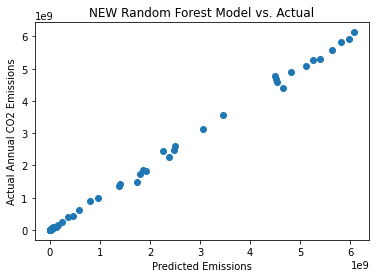

In [140]:
plt.scatter(pred5, y_test2) 
plt.title("NEW Random Forest Model vs. Actual")
plt.xlabel("Predicted Emissions")
plt.ylabel("Actual Annual CO2 Emissions")

In [142]:
mean_absolute_error(pred5, y_test2)

37659221.10671641

In [143]:
# ~37,659,221 tons off because the training size is bigger, making the predictions more accurate